# **Salifort Motors project: providing data-driven suggestions for HR**

# **PACE stages**


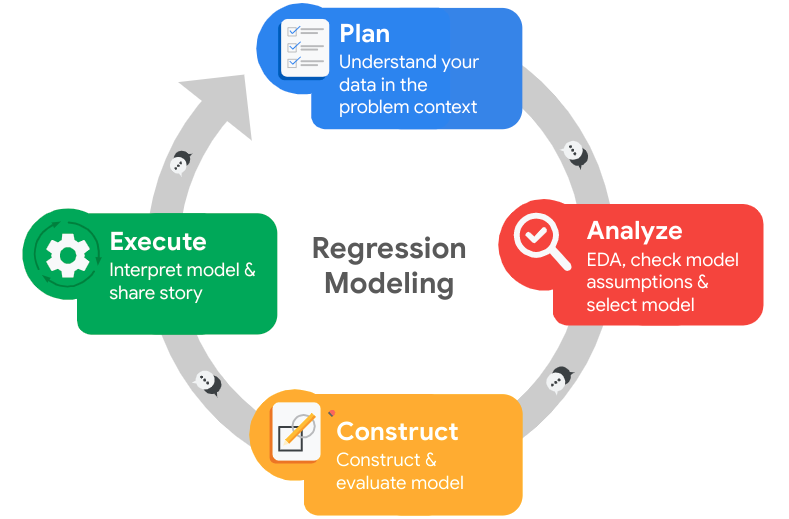

## **Pace: Plan Stage**

### The business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### The HR dataset dictionary

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Import packages and the dataset

In [41]:
# Import packages
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import scipy.stats as stats

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For saving models
import pickle

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Understand variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

* Standardize the column names so that they are all in `snake_case`.
* Correct any column names that are misspelled.
* Make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0=df0.rename(columns={"Work_accident": "work_accident", "Department": "department","average_montly_hours":"average_monthly_hours"})

# Display all column names after the update
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1=df0.drop_duplicates().reset_index(drop=True)


# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

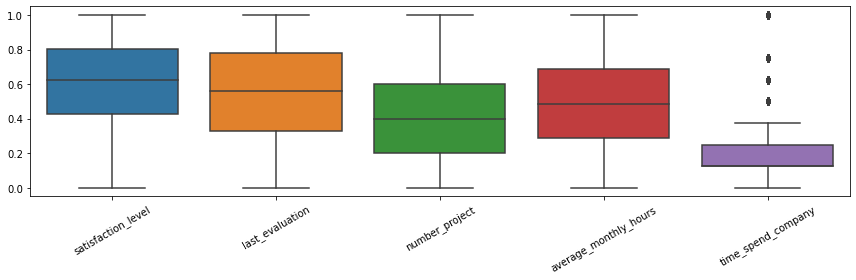

In [10]:
# The box plot shows normalized distribution of numeric variables in the dataset, 

plt.figure(figsize=(12,4))

norm_subset=df1[["satisfaction_level","last_evaluation","number_project","average_monthly_hours","time_spend_company"]]
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(norm_subset)
df_continuous_norm=pd.DataFrame(min_max_scaler.transform(norm_subset), index=norm_subset.index, columns=norm_subset.columns)

sns.boxplot(data=df_continuous_norm)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

* The results shows that `time_spend_company` might contains outliners.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [11]:
# Get numbers of people who left vs. stayed
df1["left"].value_counts()

# Get percentages of people who left vs. stayed
# df1["left"].value_counts(normalize=True)

0    10000
1     1991
Name: left, dtype: int64

In [12]:
# Check propotion of boolean variables in the dataset.
df_bool=df1[['work_accident','left','promotion_last_5years']]

In [13]:
df1.groupby(by=["promotion_last_5years","left"])["left"].agg('count')

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
Name: left, dtype: int64

### Data visualizations

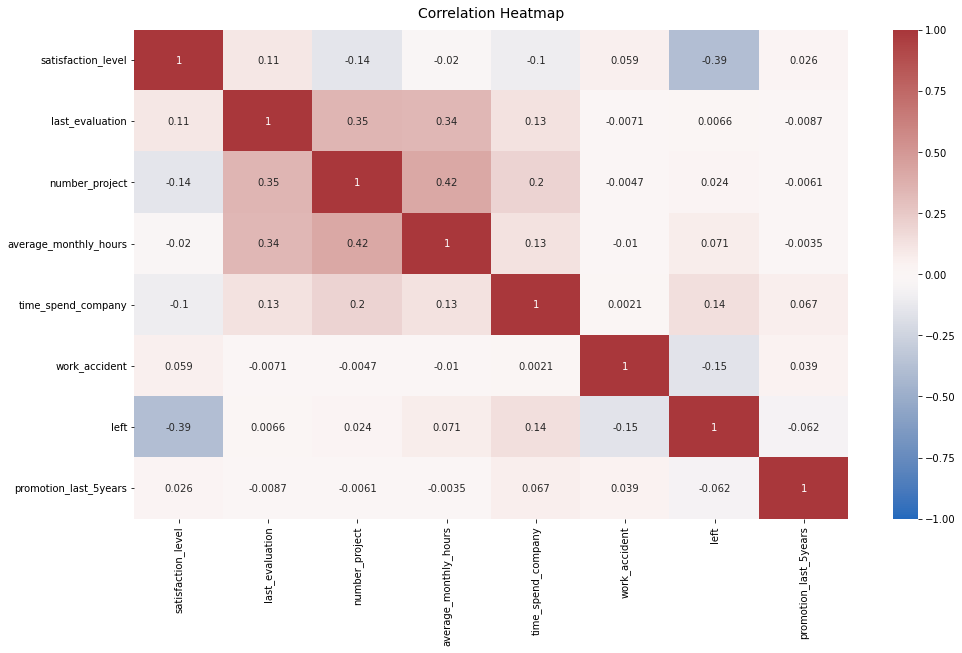

In [14]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

* No strong correlations were identified among variables in the dataset, suggesting that multicollinearity is less likely to occur when building a regression model.

### Histplot

In [15]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

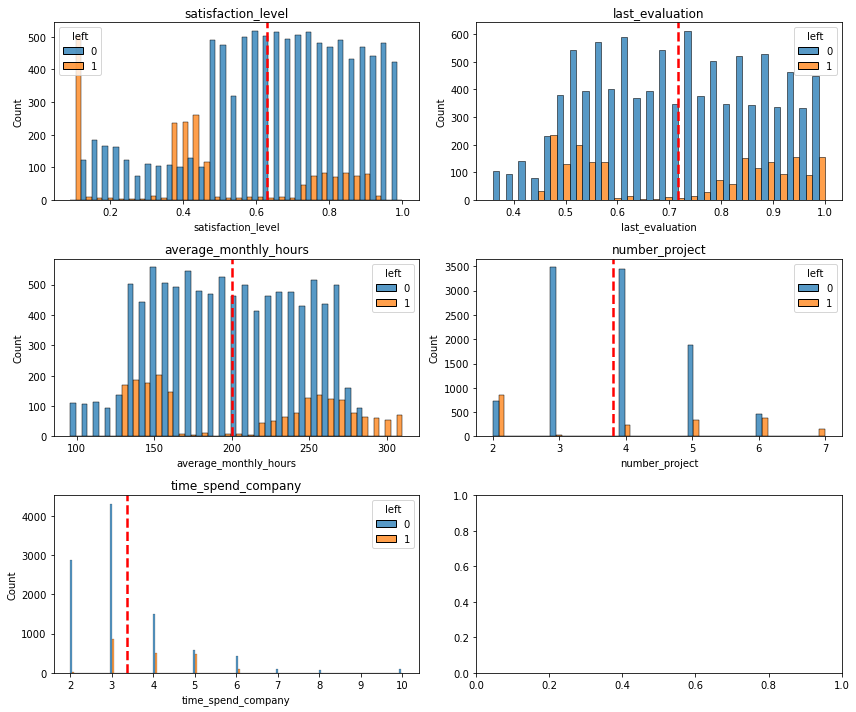

In [16]:
fig,axes=plt.subplots(3,2,figsize=(12,10))

sns.histplot(data=df1, x="satisfaction_level", ax=axes[0,0],hue='left',multiple="dodge")
axes[0,0].axvline(df1["satisfaction_level"].mean(), c='r', ls='--', lw=2.5)
axes[0,0].set_title('satisfaction_level')

sns.histplot(data=df1, x="last_evaluation", ax=axes[0,1],hue='left',multiple="dodge")
axes[0,1].axvline(df1["last_evaluation"].mean(), c='r', ls='--', lw=2.5)
axes[0,1].set_title('last_evaluation')

sns.histplot(data=df1, x="average_monthly_hours", ax=axes[1,0],hue='left',multiple="dodge")
axes[1,0].axvline(df1["average_monthly_hours"].mean(), c='r', ls='--', lw=2.5)
axes[1,0].set_title('average_monthly_hours')

sns.histplot(data=df1, x="number_project", ax=axes[1,1],hue='left',multiple="dodge")
axes[1,1].axvline(df1["number_project"].mean(), c='r', ls='--', lw=2.5)
axes[1,1].set_title('number_project')

sns.histplot(data=df1, x="time_spend_company", ax=axes[2,0],hue='left',multiple="dodge")
axes[2,0].axvline(df1["time_spend_company"].mean(), c='r', ls='--', lw=2.5)
axes[2,0].set_title('time_spend_company')

plt.tight_layout()
plt.show()

* The results above show that `last_evaluation`, `average_monthly_hours`, and `number_project` are bimodally distributed when the `left` data equals true. 
* The result above shows that `satisfaction_level` is trimodally distributed when the `left` data equals true.
* The results above show that `last_evaluation`, `average_monthly_hours`, and `satisfaction_level` are NOT normal distributed when the `left` data equals false.
* The results above show that `number_project`, and `time_spend_company` are normal distributed when the `left` data equals false, but they are right skewed.

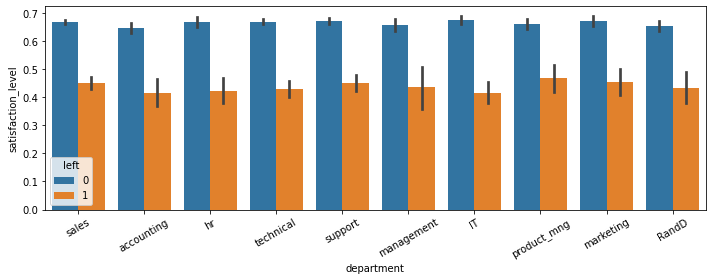

In [17]:
# Create a plot as needed
plt.figure(figsize=(10,4))
sns.barplot(data=df1, x="department", y='satisfaction_level', hue='left')
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

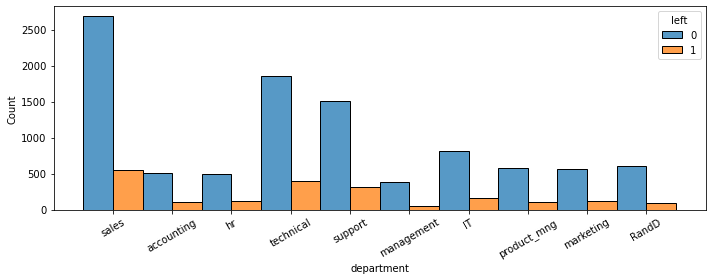

In [18]:
# Create a plot as needed
plt.figure(figsize=(10,4))
sns.histplot(data=df1, x="department", y=None, hue="left",multiple="dodge")
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

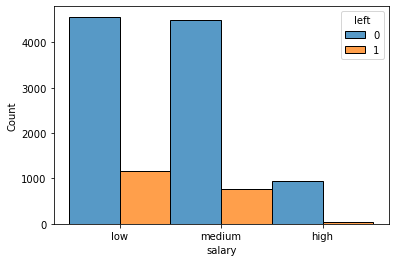

In [19]:
# Create a plot as needed
sns.histplot(data=df1, x="salary", y=None, hue="left",multiple="dodge")


The plots above show that
* Those who left have a lower average satisfaction score, with no significant difference between departments.
* The ratio of employees who left in different departments shows no significant differences.
* Fewer employees have a high-level salary, but those with a higher salary are less likely to leave the company.

# Data transformation
### Outliners

In [20]:
# Determine the number of rows containing outliers
def create_outliner_subset(df):
    for i in range(len(df.columns)):
        percentile25 = df.iloc[:,i].quantile(0.25)
        percentile75 = df.iloc[:,i].quantile(0.75)
        # Calculate interquartile range
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        
        mask_lower=(df.iloc[:,i] <= lower_limit) 
        mask_upper=(df.iloc[:,i]>=upper_limit)
        num_of_outliners=sum(mask_lower)+sum(mask_upper)

        if num_of_outliners>0:
            print(f'Variable {df.columns[i]} includes {num_of_outliners} outliners')
            print(f'Variable {df.columns[i]} upper limit: {upper_limit}')
            print(f'Variable {df.columns[i]} lower limit: {lower_limit}')
            df.iloc[df[mask_lower].index, i]=lower_limit
            df.iloc[df[mask_upper].index, i]=upper_limit
        else:
            print(f'Variable {df.columns[i]} has no outliners')
            
    return df


In [21]:
numeric_subset=df1[["satisfaction_level","last_evaluation","number_project","average_monthly_hours","time_spend_company"]]

In [22]:
outliner_checked=create_outliner_subset(numeric_subset)

Variable satisfaction_level has no outliners
Variable last_evaluation has no outliners
Variable number_project has no outliners
Variable average_monthly_hours has no outliners
Variable time_spend_company includes 824 outliners
Variable time_spend_company upper limit: 5.5
Variable time_spend_company lower limit: 1.5


In [23]:
outliner_checked.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.273455
std,0.241070,0.168343,1.163238,48.727813,1.057809
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,5.500000


### Mean centered

In [24]:
df_mc=pd.DataFrame()
df_mc['average_monthly_hours_mc']=(outliner_checked['average_monthly_hours']-outliner_checked['average_monthly_hours'].mean()).abs()

                            
df_mc['last_evaluation_mc']=(outliner_checked['last_evaluation']-outliner_checked['last_evaluation'].mean()).abs()

                            
df_mc.describe()

,average_monthly_hours_mc,last_evaluation_mc
count,11991.000000,11991.000000
mean,42.289457,0.146720
std,24.204389,0.082528
min,0.473522,0.003317
25%,22.526478,0.076683
50%,42.526478,0.146683
75%,60.473522,0.213317
max,109.526478,0.356683


In [25]:
df_normalization=pd.concat([outliner_checked,df_mc],axis=1)
df_normalization.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,average_monthly_hours_mc,last_evaluation_mc
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.273455,42.289457,0.146720
std,0.241070,0.168343,1.163238,48.727813,1.057809,24.204389,0.082528
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.473522,0.003317
25%,0.480000,0.570000,3.000000,157.000000,3.000000,22.526478,0.076683
50%,0.660000,0.720000,4.000000,200.000000,3.000000,42.526478,0.146683
75%,0.820000,0.860000,5.000000,243.000000,4.000000,60.473522,0.213317
max,1.000000,1.000000,7.000000,310.000000,5.500000,109.526478,0.356683


### Normalization

In [26]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df_normalization)
df_continuous_norm=pd.DataFrame(min_max_scaler.transform(df_normalization), index=df_normalization.index, columns=df_normalization.columns)
df_continuous_norm.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,average_monthly_hours_mc,last_evaluation_mc
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.593031,0.557316,0.360570,0.488194,0.363844,0.383446,0.405819
std,0.264912,0.263035,0.232648,0.227700,0.302231,0.221951,0.233548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.428571,0.328125,0.200000,0.285047,0.285714,0.202222,0.207618
50%,0.626374,0.562500,0.400000,0.485981,0.285714,0.385620,0.405714
75%,0.802198,0.781250,0.600000,0.686916,0.571429,0.550191,0.594286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### One hot encoding

In [27]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [127]:
df_cat=pd.get_dummies(df1[['salary',"department"]],drop_first=True)
df2=pd.concat([df1,df_cat],axis=1)
df3=pd.concat([df_continuous_norm,df_cat,df_bool],axis=1)

df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,average_monthly_hours_mc,last_evaluation_mc,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,work_accident,left,promotion_last_5years
0,0.318681,0.265625,0.0,0.285047,0.285714,0.394304,0.518911,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.780220,0.781250,0.6,0.775701,1.000000,0.559847,0.396191,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0.021978,0.812500,1.0,0.822430,0.571429,0.651545,0.452790,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0.692308,0.796875,0.6,0.593458,0.857143,0.202222,0.424490,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.307692,0.250000,0.0,0.294393,0.285714,0.375964,0.547210,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Check transform result

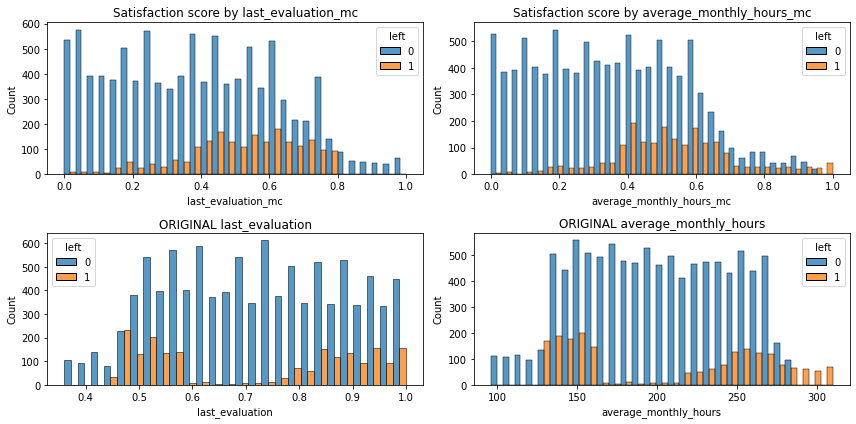

In [29]:
# sns.lineplot(data=df3,x="last_evaluation_mc",y="satisfaction_level",hue="left")
# sns.lineplot(data=df_continuous, x="average_montly_hours", y="satisfaction_level")

fig,axes=plt.subplots(2,2,figsize=(12,6))

sns.histplot(data=df3,x="last_evaluation_mc", ax=axes[0,0],hue='left',multiple='dodge')
axes[0,0].set_title('Satisfaction score by last_evaluation_mc')

sns.histplot(data=df3, x="average_monthly_hours_mc", ax=axes[0,1],hue='left',multiple='dodge')
axes[0,1].set_title('Satisfaction score by average_monthly_hours_mc')

sns.histplot(data=df1, x="last_evaluation",  ax=axes[1,0],hue='left',multiple='dodge')
axes[1,0].set_title('ORIGINAL last_evaluation')

sns.histplot(data=df1, x="average_monthly_hours", ax=axes[1,1],hue='left',multiple='dodge')
axes[1,1].set_title('ORIGINAL average_monthly_hours')


plt.tight_layout()
plt.show()

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building & Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the types of models most appropriate for this task.

The dependent variable is binary. A binary logistic regression model will be appropriate for this task.

### Modeling

Add as many cells as you need to conduct the modeling process.

### Logistic regression model built on dataframe3

In [30]:
### YOUR CODE HERE ###
X3 = df3[['satisfaction_level', 'number_project',
       'time_spend_company', 'average_monthly_hours_mc',
       'last_evaluation_mc', 'salary_low', 'salary_medium', 'work_accident',
       'promotion_last_5years']]
y3 = df3["left"]
X3_train, X3_test,y3_train, y3_test = train_test_split(X3,y3,test_size=0.3,random_state=0,stratify=y3)

In [32]:
clf3 = LogisticRegression().fit(X3_train,y3_train)
clf3.coef_
X3.columns
clf3.intercept_
y3_pred = clf3.predict(X3_test)
print('accuracy score:', "%.6f" % accuracy_score(y3_test, y3_pred))
print('precision score:', "%.6f" % precision_score(y3_test, y3_pred))
print('recall score:', "%.6f" % recall_score(y3_test, y3_pred))
print("F1 Score:", "%.6f" % f1_score(y3_test, y3_pred))

accuracy score: 0.839633
precision score: 0.529586
recall score: 0.299832
F1 Score: 0.382888


In [33]:
odds_ratios_3 = [np.exp(i)for i in clf3.coef_ ]

In [34]:
# Coefficients and Odds ratios
clf3_result=pd.DataFrame({X3.columns[i]:[clf3.coef_[0][i],odds_ratios_3[0][i]] for i in range(len(X3.columns))},columns=X3.columns,index=["coefficients","odds_ratios"])
clf3_result

,satisfaction_level,number_project,time_spend_company,average_monthly_hours_mc,last_evaluation_mc,salary_low,salary_medium,work_accident,promotion_last_5years
coefficients,-2.951983,-1.084403,2.092473,2.976330,2.548529,1.681408,1.223366,-1.541883,-1.177148
odds_ratios,0.052236,0.338104,8.104931,19.615696,12.788278,5.373118,3.398608,0.213978,0.308156


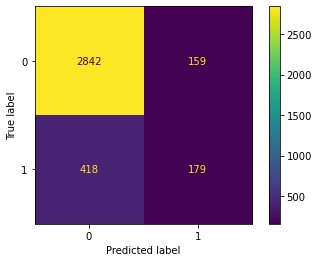

In [37]:
cm3 = confusion_matrix(y3_test, y3_pred, labels = clf3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix = cm3,display_labels = clf3.classes_)
disp3.plot(values_format='')

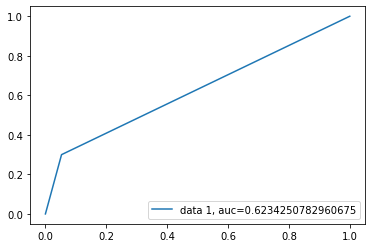

In [38]:
fpr, tpr, _ = roc_curve(y3_test,  y3_pred)
auc = roc_auc_score(y3_test, y3_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

* The score of metrics are not very good except for the accuracy score.
* The unbalanced data might be the cause of this situation. 
* The next step will be to attempt building a new model based on resampled data.

### Logistic regression model built on resampled data

In [42]:
df3_upsampled = resample(df3.loc[df3["left"]==1],random_state=0,n_samples=5000,replace=True)
df3_downsampled=resample(df3.loc[df3["left"]==0],random_state=0,n_samples=7000,replace=True)
df_resampled=pd.concat([df3_upsampled,df3_downsampled])
df_resampled.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,average_monthly_hours_mc,last_evaluation_mc,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,work_accident,left,promotion_last_5years
684,0.769231,0.750000,0.4,0.672897,0.857143,0.358110,0.339592,0,1,0,0,0,0,0,0,1,0,0,0,1,0
559,0.000000,0.781250,0.8,0.855140,0.571429,0.715734,0.396191,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1653,0.362637,0.171875,0.0,0.191589,0.285714,0.577701,0.688707,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1216,0.362637,0.312500,0.0,0.233645,0.285714,0.495172,0.434013,1,0,1,0,0,0,0,0,0,0,0,0,1,0
835,0.373626,0.312500,0.0,0.172897,0.285714,0.614380,0.434013,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [43]:
df_resampled.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company',
       'average_monthly_hours_mc', 'last_evaluation_mc', 'salary_low',
       'salary_medium', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [44]:
### YOUR CODE HERE ###
X = df_resampled[['satisfaction_level', 'number_project',
       'time_spend_company', 'average_monthly_hours_mc',
       'last_evaluation_mc', 'salary_low', 'salary_medium', 'work_accident',
       'promotion_last_5years']]
y = df_resampled["left"]
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [46]:
clf = LogisticRegression().fit(X_train,y_train)
clf.coef_
X.columns
clf.intercept_
y_pred = clf.predict(X_test)
print('accuracy score:', "%.6f" % accuracy_score(y_test, y_pred))
print('precision score:', "%.6f" % precision_score(y_test, y_pred))
print('recall score:', "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

accuracy score: 0.834722
precision score: 0.791372
recall score: 0.819333
F1 Score: 0.805110


In [47]:
odds_ratios = [np.exp(i)for i in clf.coef_ ]

In [48]:
# Coefficients and Odds ratios
clf_result=pd.DataFrame({X.columns[i]:[clf.coef_[0][i],odds_ratios[0][i]] for i in range(len(X.columns))},columns=X.columns,index=["coefficients","odds_ratios"])
clf_result

,satisfaction_level,number_project,time_spend_company,average_monthly_hours_mc,last_evaluation_mc,salary_low,salary_medium,work_accident,promotion_last_5years
coefficients,-3.155626,-1.475566,2.994301,3.272570,2.945786,1.564221,1.106727,-1.352619,-1.428406
odds_ratios,0.042612,0.228649,19.971394,26.379049,19.025615,4.778950,3.024444,0.258562,0.239691


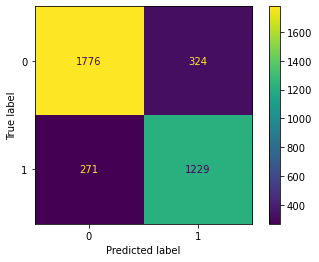

In [49]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(values_format='')

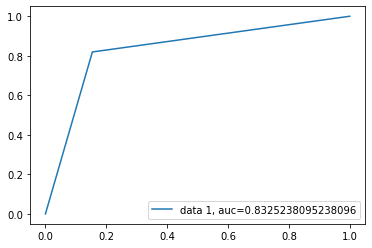

In [51]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Evaluation of logistic regression model
From the model result, the most important variables are: `average monthly hours`, `time spend in company`, `last evaluation`. 
* Average monthly hours: When average monthly hours deviating from the mean, intensifies the risk of leaving. 
* Time spend in company: An increase in the time spent working at the company is positively associated with the risk of leaving. This may indicate potential career changes as employees spend more time in the company. 
* Last evaluation : When last evaluation score deviating from the mean, the risk of leaving will increases . This may indicate that receiving scores too high or too low in evaluations is associated with the risk of leaving. 

The model trained on resampled data exhibits improvements in both recall and precision scores. However, caution is warranted as the model might be overfitted due to the moderate imbalance in the data.

The results of the data exploratory analysis reveal that, instead of a normal distribution, numeric variables exhibit two or three peaks in the group of employees who left, while showing a more uniform distribution in the group of employees who stayed.

**Considering the insights gained from the results and evaluations, building machine learning models is the next step.**

### Decision tree model1

In [128]:
Xtr = df2[['satisfaction_level', 'number_project',
       'time_spend_company', 'average_monthly_hours',
       'last_evaluation', 'salary_low', 'salary_medium', 'work_accident',
       'promotion_last_5years']]
ytr = df2["left"]
Xtr_train, Xtr_test,ytr_train, ytr_test = train_test_split(Xtr,ytr,test_size=0.3,random_state=0,stratify=ytr)

In [129]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [130]:
%%time
tree1.fit(Xtr_train, ytr_train)

CPU times: user 2.45 s, sys: 0 ns, total: 2.45 s
Wall time: 2.45 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [131]:
# Check best parameters
print(tree1.best_params_)
# Check best AUC score on CV
print(tree1.best_score_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.9692787108150571


In [132]:
def make_results(model_name:str, model_object, metric:str):
    '''
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
    * Returns a pandas df with the F1, recall, precision, accuracy, and auc scores 
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [133]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.975376,0.910327,0.941714,0.981294,0.969279


All of these scores from the decision tree model are strong indicators of good model performance. Machine learning models might be a better choice for generating predictions. Decision trees can be vulnerable to overfitting; however, random forest models can avoid this problem and will be built in the next step.

### Random forest model1

In [137]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [138]:
%%time
# rf1.fit(Xtr_train, ytr_train) # --> Wall time: ~10min

CPU times: user 7min 51s, sys: 185 ms, total: 7min 51s
Wall time: 7min 52s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [139]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [140]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [141]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [142]:
# Write pickle
# write_pickle(path, rf1, 'hr_rf1')

In [143]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [144]:
# Check best AUC score on CV
rf1.best_score_
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [145]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.975376  0.910327  0.941714  0.981294  0.969279
              model  precision   recall       F1  accuracy       auc
0  random forest cv   0.951328  0.90961  0.92998  0.977243  0.980375


#### Gets all the scores from a model's predictions.

In [146]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [147]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, Xtr_test, ytr_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.956822,0.927973,0.942177,0.981101,0.959821


### Feature Engineering

There is a chance that there is some data leakage occurring. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

The new data would exclude `satisfaction_level`, and a new feature called `overworked` would be added to roughly capture whether an employee is overworked.

In [148]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df4 = df2.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df4.head()

,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,sales,low,1,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,sales,medium,0,1,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,sales,medium,0,1,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,sales,low,1,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,sales,low,1,0,0,0,0,0,0,0,1,0,0


In [149]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df4['overworked'] = df4['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df4['overworked'].max())
print('Min hours:', df4['overworked'].min())

Max hours: 310
Min hours: 96


In [150]:
# Define `overworked` as working > 175 hrs/week
df4['overworked'] = (df4['overworked'] > 175).astype(int)

# Display first few rows of new column
df4['overworked'].head()

# Drop the `average_monthly_hours` column
df4 = df4.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df4.head()

,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,department,salary,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,sales,low,1,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,sales,medium,0,1,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,sales,medium,0,1,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,sales,low,1,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,sales,low,1,0,0,0,0,0,0,0,1,0,0,0


### Decision tree model2

In [152]:
# Isolate the outcome variable
ytr2 = df4['left']

# Select the features
Xtr2 = df4.drop(['left',"department","salary"], axis=1)

# Create test data
Xtr2_train, Xtr2_test, ytr2_train, ytr2_test = train_test_split(Xtr2, ytr2, test_size=0.25, stratify=ytr2, random_state=0)

In [153]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [154]:
%%time
tree2.fit(Xtr2_train, ytr2_train)

CPU times: user 2.29 s, sys: 0 ns, total: 2.29 s
Wall time: 2.29 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [155]:
# Check best params
print(tree2.best_params_)

# Check best AUC score on CV
print(tree2.best_score_)

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.9579551475964502


In [156]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.975376  0.910327  0.941714  0.981294  0.969279
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.854952  0.903553  0.878003  0.958189  0.957955


### Random forest model2

In [157]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [161]:
%%time
rf2.fit(Xtr2_train, ytr2_train) # --> Wall time: 7min 5s

CPU times: user 7min 7s, sys: 995 ms, total: 7min 8s
Wall time: 7min 8s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [162]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [163]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [164]:
# Check best params
rf2.best_params_
# Check best AUC score on CV
rf2.best_score_

0.9650022441733213

In [165]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.854952  0.903553  0.878003  0.958189  0.957955
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.965002


In [166]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, Xtr2_test, ytr2_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


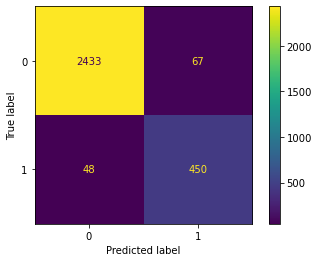

In [167]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(Xtr2_test)
cm = confusion_matrix(ytr2_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model. 

#### Decision tree splits

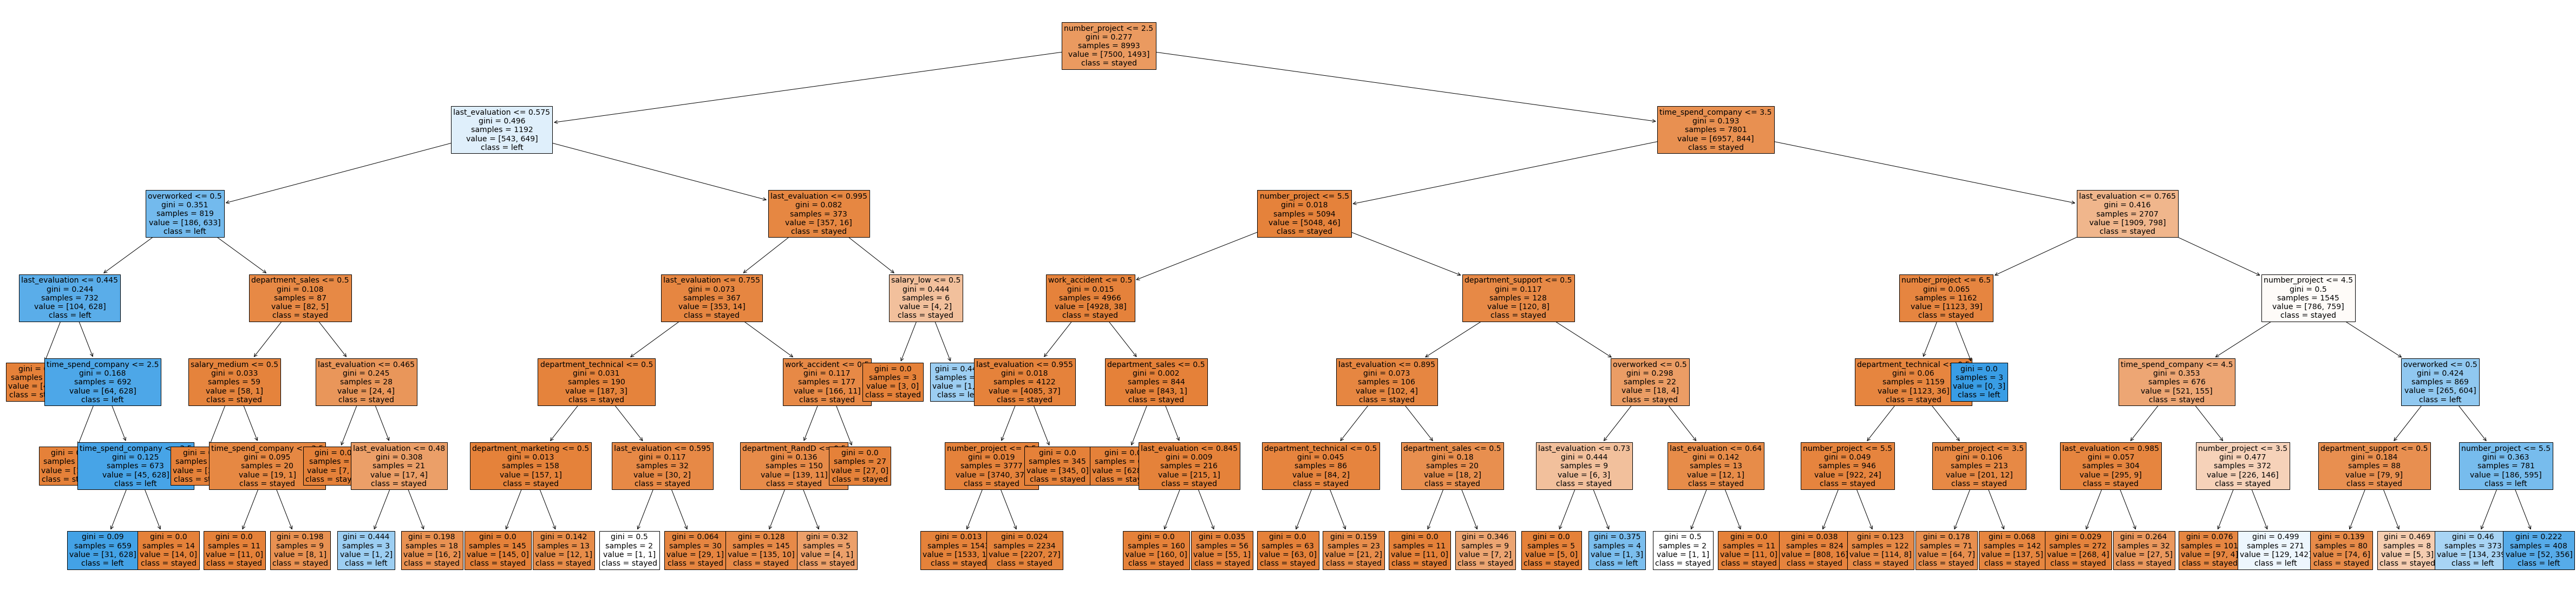

In [169]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=Xtr2.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [170]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=Xtr2.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.344058
number_project,0.343520
time_spend_company,0.215603
overworked,0.093526
department_support,0.001142
salary_low,0.000737
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_RandD,0.000092


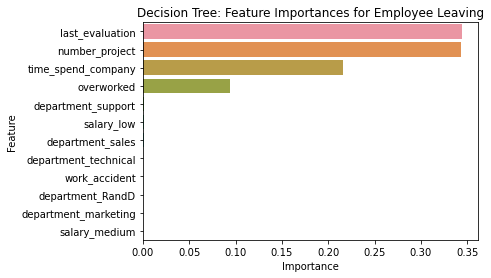

In [171]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `time_spend_company`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance


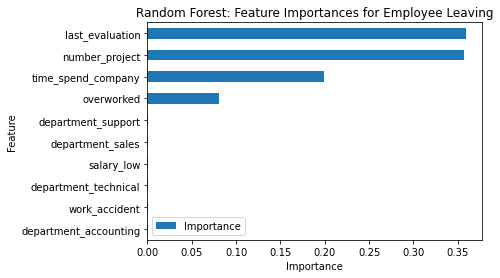

In [172]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = Xtr2.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `time_spend_company`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
**Tree-based Machine Learning**   

After conducting feature engineering,    
* The decision tree model achieved AUC of 96.0%, precision of 85.5%, recall of 90.4%, f1-score of 87.8%, and accuracy of 96.0%, on the test set. 
* The random forest model achieved AUC of 96.5%, precision of 87.0%, recall of 88.0%, f1-score of 87.2%, and accuracy of 96.5%, on the test set. 

### Conclusion, Recommendations, Next Steps
The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 
